# Assignment 3 specification

The purpose of this assignment is to analyse the factors that might lead to (increased) consumption of both legal and illegal drugs. The data set is described and is available from the [ICLSR site](https://www.icpsr.umich.edu/web/ICPSR/studies/36536) at the University of Michigan.

The dataset is provided with this notebook as a csv file.

For your convenience, code is provide below to read the data into the dataframe, and this notebook is setup so that students ar prompted to complete the tasks.


Students are asked to

1. Read the data and split it into training and test datasets. Perform 3-pass EDA on this data, to learn about its structure and to assess which features might be suitable for prediction. __[20 marks]__
2. For a decision tree classifier and any other classifier of your choosing, use the data description provided with the CA3 briefing in `DrugConsumption.pdf`  and the knowledge gained during EDA to find the best predictive model for the alcohol target, justifying the evaluation metric(s) you use. __[20 marks]__
   - When comparing between the classifiers, students should consider a wide range of classification metrics, not just one.
3. Use the same procedure as Task 2 to predict `cannabis`. Which is easier to predict accurately, `alcohol` or `cannabis`, and why? __[25 marks]__
   - When comparing across the targets, students should consider a wide range of classification metrics, not just one.
4. Use hierarchical clustering to look for structural relationships within and between the features provided in the data. Hence, or otherwise, apply partitional clustering to the same data, discussing what groups of users have taken part in the drug consumption study. __[35 marks]__

# Here is some code to help you get started.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, f1_score, classification_report, accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set_style('darkgrid')

In [ ]:
# The factors are the demographics, e.g., gender, country etc., with the responses each participant gave to the personality questionnaire.
# The targets are the consumption levels of the different drugs.

# Task 1: Read the data and split it into training and test datasets. Perform 3-pass EDA on this data, to learn about its structure and to assess which features might be suitable for prediction.

##Start of Answer 1##

## Importing the Dataset

Firstly, the Drug Consumption data was read into the DataFrame. The shape of the DataFrame was printed out along with the first 5 rows of the dataset to make sure the data was read in properly.

In [15]:
# Importing the dataset from the specified CSV file
df = pd.read_csv("data/DrugConsumption.csv")

# Printing the shape of the DataFrame to show the number of rows and columns
print(df.shape)

# Displaying the first 5 rows of the dataset to get an initial view of the data
df.head()

(1884, 32)


ID    Age Gender                          Education Country Ethnicity  \
0   2  25-34      M                   Doctorate degree      UK     White   
1   3  35-44      M  Professional certificate/ diploma      UK     White   
2   4  18-24      F                     Masters degree      UK     White   
3   5  35-44      F                   Doctorate degree      UK     White   
4   6    65+      F            Left school at 18 years  Canada     White   

   Nscore  Escore  Oscore  Ascore  ...  Ecstasy  Heroin  Ketamine Legalh  LSD  \
0      29      52      55      48  ...      CL4     CL0       CL2    CL0  CL2   
1      31      45      38      24  ...      CL0     CL0       CL0    CL0  CL0   
2      34      34      44      47  ...      CL0     CL0       CL2    CL0  CL0   
3      43      27      41      41  ...      CL1     CL0       CL0    CL1  CL0   
4      29      38      33      55  ...      CL0     CL0       CL0    CL0  CL0   

  Meth Mushrooms Nicotine Semer  VSA  
0  CL3       CL0      CL4   CL0  CL0  
1  CL0       CL1      CL0   CL0  CL0  
2  CL0       CL0      CL2   CL0  CL0  
3  CL0       CL2      CL2   CL0  CL0  
4  CL0       CL0      CL6   CL0  CL0  

[5 rows x 32 columns]

## Splitting of Dataset into Training and Test

In [4]:
# Mapping age groups to numerical values
df['Age'] = df['Age'].map({
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55-64': 5,
    '65+': 6
})

# List of categorical columns that need one-hot encoding
categorical_columns = ['Gender', 'Education', 'Country', 'Ethnicity', 'Amphet', 'Amyl', 
                       'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
                       'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

# Apply get_dummies for one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns=['Alcohol'])
y = df['Alcohol']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output sizes of splits
print(f"Training set size: {len(X_train)} observations")
print(f"Test set size: {len(X_test)} observations")

Training set size: 1507 observations
Test set size: 377 observations


## 1st Pass: High-Level Summary

Understanding the quality and structure of the dataset through the data overview stage is crucial before moving on. This procedure includes confirming data types, which indicate whether variables are category or numeric. Since missing numbers can lead to errors in modelling or analysis, finding them is crucial. Finally, summary statistics for numerical columns help evaluate the scale, dispersion (standard deviation), central tendency (mean, median), and any outliers or anomalies. We utilised the `info()` function, which shows the column names, data types, and the quantity of non-null values per column, to carry out these checks. The `describe()` function comes next, producing summary statistics for numerical features such as mean, standard deviation, and quartiles. Lastly, `isnull().sum()` was used to count missing values for each column.

In [5]:
# Summary information about the dataset
print("\nData Info:")
print(X_train.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(X_train.describe())

# Check for missing values
print("\nMissing Values:")
print(X_train.isnull().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1507 entries, 1202 to 1126
Columns: 136 entries, ID to VSA_CL6
dtypes: bool(127), int64(9)
memory usage: 304.6 KB
None

Summary Statistics:
                ID          Age       Nscore      Escore       Oscore  \
count  1507.000000  1507.000000  1507.000000  1507.00000  1507.000000   
mean    945.159257     2.331121    35.813537    39.46649    44.231586   
std     543.641003     1.285265     9.070500     7.08369     7.115915   
min       2.000000     1.000000    14.000000    16.00000    24.000000   
25%     479.500000     1.000000    29.000000    35.00000    39.000000   
50%     946.000000     2.000000    36.000000    40.00000    44.000000   
75%    1410.500000     3.000000    42.000000    44.00000    50.000000   
max    1888.000000     6.000000    60.000000    58.00000    60.000000   

            Ascore       Cscore  Impulsivity           SS  
count  1507.000000  1507.000000  1507.000000  1507.000000  
mean     42.270073    41.

The dataset contains 31 features, including 8 numerical and 23 categorical features. No missing values were found, ensuring the data is complete and ready for analysis. Key numerical features, such as Nscore, range from 14 to 60, with an average around 35.8. These statistics highlight the variability of features that could be important for modeling.

## 2nd Pass: Feature Distributions

The analysis of individual feature distributions is the main goal of the second pass. Numerical features are evaluated using histograms, which offer information on their skewness, spread, and possible outliers. Count plots for categorical features aid in determining the balance of class distributions, which is crucial for comprehending the contributions made by various categories to the dataset. Preprocessing actions like correcting class imbalances in categorical characteristics or normalising skewed numerical data are informed by the patterns found in this research.


Plotting Histograms for Numerical Features:


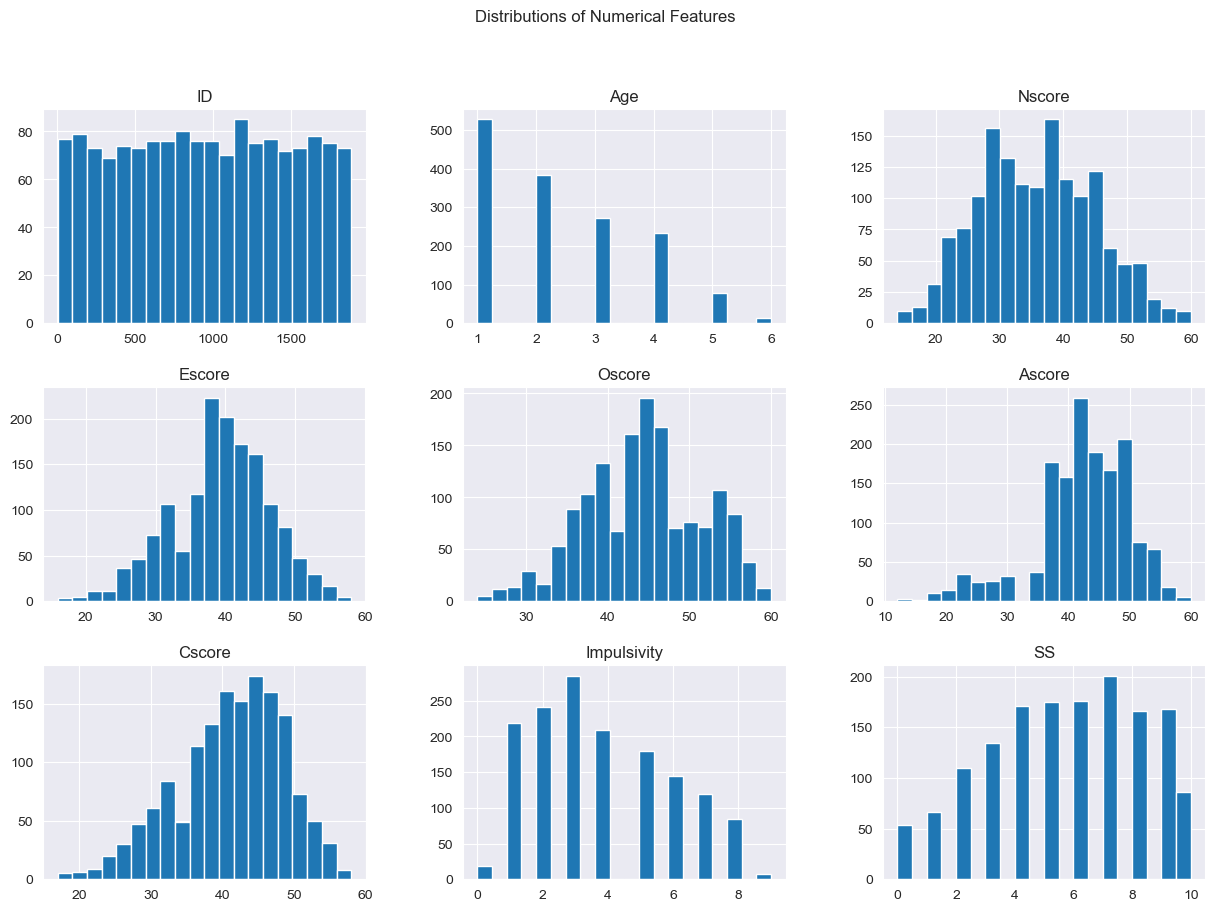


Plotting Count Plots for Categorical Features:


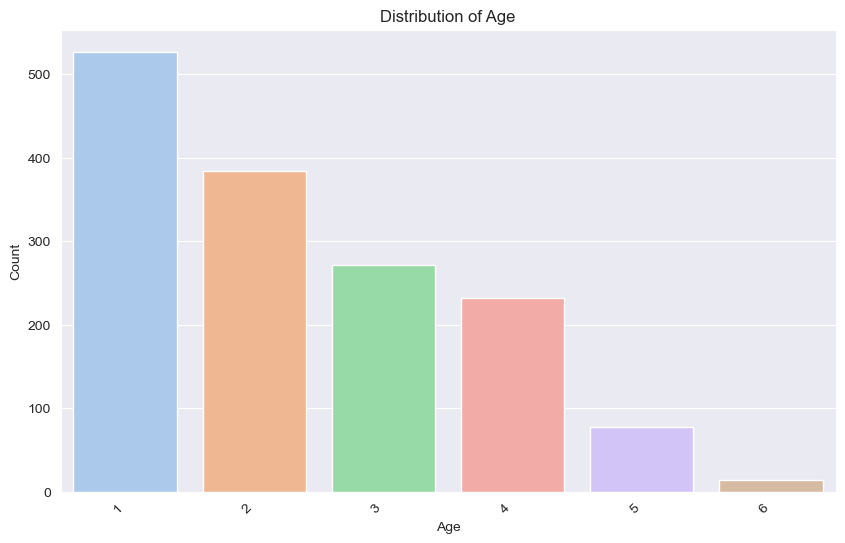

ValueError: Could not interpret value `Gender` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [6]:
# Plot histograms for numerical features
print("\nPlotting Histograms for Numerical Features:")
X_train.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distributions of Numerical Features')
plt.show()

# Plot count plots for categorical features
print("\nPlotting Count Plots for Categorical Features:")
categorical_cols = ['Age', 'Gender', 'Education']
for col in categorical_cols:
    plt.figure(figsize=(10, 6)) 
    sns.countplot(data=X_train, x=col, palette='pastel', legend=False, hue=col)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.show()

The histograms showed that while some numerical features, such Impulsivity, exhibit some skewness and possible outliers, the majority of features, like Nscore and Escore, follow a near-normal distribution. The majority of participants fall into the 18–24 and 25–34 age categories, according to the count plots for categorical variables like gender and age, which show imbalances. These trends imply that balancing strategies would be needed for categorical variables in modelling, and scaling or transformations might be necessary for numerical data.

## 3rd Pass: Relationships Between Features

In order to find correlations and dependencies, the third pass investigates the relationships between features. For numerical features, a correlation heatmap aids in identifying linear correlations that may direct feature engineering and selection. Furthermore, illustrating the connections between the target variable and categorical variables offers insights into trends that could affect forecasts. To comprehend how features interact and contribute to the target, these studies are essential.


Plotting Correlation Heatmap for Numerical Features:


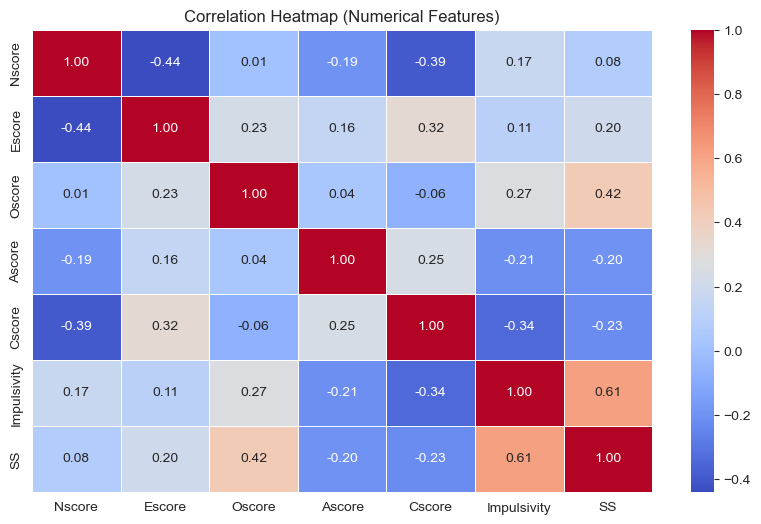


Plotting Alcohol Consumption by Age Group:


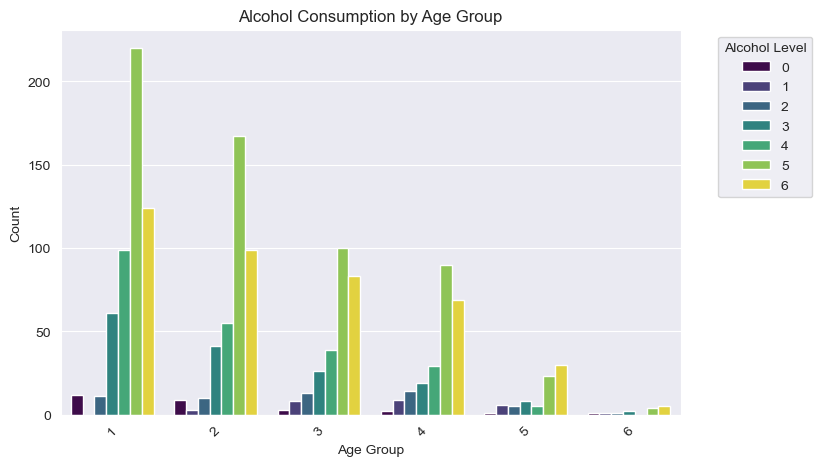

In [7]:
# Correlation heatmap for numerical features
print("\nPlotting Correlation Heatmap for Numerical Features:")
plt.figure(figsize=(10, 6))
correlation_matrix = X_train[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsivity', 'SS']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

# Convert y_train to a Pandas Series with the same index as X_train
y_train = pd.Series(y_train, index=X_train.index, name='Alcohol')

# Relationship between Age and Alcohol consumption
print("\nPlotting Alcohol Consumption by Age Group:")
plt.figure(figsize=(8, 5))
sns.countplot(data=X_train.join(y_train), x='Age', hue='Alcohol', palette='viridis', 
              order=X_train['Age'].value_counts().index)  
plt.title('Alcohol Consumption by Age Group')  
plt.xlabel('Age Group') 
plt.ylabel('Count')  
plt.legend(title='Alcohol Level', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.xticks(rotation=45) 
plt.show()

The correlation heatmap revealed moderate positive relationships between Nscore and Impulsivity and a slight negative correlation between Cscore and SS. These relationships could influence the importance of certain features in predictive models. The count plot of Age vs. Alcohol levels showed that alcohol consumption patterns differ across age groups, with higher consumption levels (CL5, CL6) being most common in the 18-24 and 25-34 age groups. These findings suggest age may be a strong predictor for alcohol consumption.

##End of Answer 1##

# Task 2: For a decision tree classifier and any other classifier of your choosing, use the introduction to the survey and the data description provided in `DrugConsumption.pdf`  and the knowledge gained during EDA to find the best predictive model for the alcohol target, justifying the evaluation metric(s) you use.

##Start of Answer 2##

## Decision Tree Classifier

A supervised learning technique called the Decision Tree Classifier divides data into subsets according to feature values by constructing a tree-like structure. A Decision Tree model is first initialised and trained using the provided training dataset by this code. The model's performance is assessed using 10-fold cross-validation. With this approach, the dataset is divided into 10 sections, nine of which are used to train the model, while the remaining one is used to validate it. Ten iterations of this procedure yield a reliable indicator of the model's capacity to generalise to new data. Evaluation measures such as accuracy, precision, recall, and F1-score are calculated after the classifier has been trained and validated on a different test set. These metrics evaluate the classifier's ability to predict each target variable class.

In [8]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation with F1-score (macro-averaged for multiclass or imbalanced binary)
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=10, scoring='f1_macro')
print("Decision Tree 10-fold CV F1-score: ", np.mean(dt_cv_scores))

# Train the Decision Tree model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Evaluate the model's performance
print("Decision Tree Test Classification Report:\n", classification_report(y_test, dt_pred))

# Optionally calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Test Accuracy: ", dt_accuracy)


Decision Tree 10-fold CV F1-score:  0.1560666910505702
Decision Tree Test Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.17      0.12         6
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        14
           3       0.11      0.07      0.09        41
           4       0.20      0.18      0.19        60
           5       0.42      0.42      0.42       154
           6       0.23      0.24      0.24        95

    accuracy                           0.27       377
   macro avg       0.15      0.16      0.15       377
weighted avg       0.27      0.27      0.27       377

Decision Tree Test Accuracy:  0.27320954907161804


The results showed that the Decision Tree model did not perform well. The model has trouble correctly classifying the majority of classes, as evidenced by the extremely low 10-fold cross-validation F1-score of 0.16. The test set's classification report reveals that most classes have relatively low precision, recall, and F1-scores; nevertheless, some classes (such as class 1 and class 2) have precision and recall of 0.00, indicating that the model was unable to accurately predict these classes. With an overall test accuracy of 27%, it appears that the model is only producing a tiny percentage of accurate predictions. Class imbalance, insufficient feature representation, or model configuration may be the cause of this poor performance.

## Random Forest Classifier

By constructing an ensemble of several decision trees, the Random Forest Classifier expands on the Decision Tree. A randomly chosen subset of data and features is used to train each tree, and either majority voting or average is used to make the final forecast. This method increases resilience and decreases overfitting. The code uses 10-fold cross-validation to test the generalisation performance of a Random Forest classifier that has been trained on the training set. The model is then evaluated on the test set, just like the Decision Tree, and metrics like accuracy, precision, recall, and F1-score are computed.

In [9]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform cross-validation with F1-score
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='f1_macro')
print("Random Forest 10-fold CV F1-score: ", np.mean(rf_cv_scores))

# Train the Random Forest model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the model's performance
print("Random Forest Test Classification Report:\n", classification_report(y_test, rf_pred))

# Optionally calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Test Accuracy: ", rf_accuracy)


Random Forest 10-fold CV F1-score:  0.13539899752417345
Random Forest Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        41
           4       0.33      0.03      0.06        60
           5       0.43      0.84      0.57       154
           6       0.36      0.25      0.30        95

    accuracy                           0.41       377
   macro avg       0.16      0.16      0.13       377
weighted avg       0.32      0.41      0.32       377

Random Forest Test Accuracy:  0.41114058355437666


C:\Users\denis\anaconda3\envs\data_mining\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\denis\anaconda3\envs\data_mining\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\denis\anaconda3\envs\data_mining\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

Although it performs marginally better than the Decision Tree model, the Random Forest model nonetheless performs poorly. The model appears to be having difficulty correctly classifying the majority of classes, as indicated by the 10-fold cross-validation F1-score of 0.14. The classification report for the test set shows that most classes have very low accuracy, recall, and F1-scores; certain classes, including classes 0, 1, and 2, have a score of 0.00, which indicates that the model is not making any accurate predictions about them. With a precision of 0.43 and recall of 0.84 for class 5, the model performs better, leading to a higher F1-score of 0.57. Nevertheless, the macro and weighted averages also show subpar model performance across the classes, and the total accuracy of 41% is still low.

##End of Answer 2##

# Task 3: Use the same procedure as Task 2 to predict the following target: cannabis. Is `alcohol` or `cannabis` easier to predict accurately, and why?

##Start of Answer 3##

In order to predict cannabis usage, models must be constructed using the same methodology as for alcohol in Task 2. Here, our objectives are to train a Random Forest Classifier and a Decision Tree Classifier, assess how well they perform on the cannabis dataset, and juxtapose their predictive accuracy with that of alcohol. The question is whether cannabis use is more predictable than alcohol use. The quality and applicability of the dataset's characteristics, the connections between predictors and the target variable, and the distribution of classes within the target all play a significant role in this. Model performance may be impacted by imbalances or poor correlations between characteristics and cannabis use, which could make prediction more difficult.

## Preprocess the Data

In [10]:
# Load dataset (replace with actual dataset path or DataFrame)
data = pd.read_csv("data/DrugConsumption.csv")

# Set the target as 'cannabis'
X = data.drop('Cannabis', axis=1)
y = data['Cannabis']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing: Handle missing values and encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

## Decision Tree Classifier

We projected cannabis usage levels across seven classes using the Decision Tree Classifier. The objective is to analyse its accuracy and F1-score on the test data and evaluate its performance using 10-fold cross-validation on the training data. Despite its computational efficiency and relative simplicity, the Decision Tree has the potential to overfit training data, particularly when the data is noisy or unbalanced.

In [11]:
# Create a pipeline for preprocessing and Decision Tree
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the Decision Tree
decision_tree_pipeline.fit(X_train, y_train)

# Evaluate with 10-fold cross-validation
dt_cv_scores = cross_val_score(decision_tree_pipeline, X_train, y_train, cv=10, scoring='f1_weighted')

# Test set predictions
y_pred_dt = decision_tree_pipeline.predict(X_test)

# Metrics
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Print results
print("Decision Tree 10-fold CV F1-score: ", dt_cv_scores.mean())
print("Decision Tree Test Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Test Accuracy: ", dt_accuracy)


Decision Tree 10-fold CV F1-score:  0.3728984157035339
Decision Tree Test Classification Report:
              precision    recall  f1-score   support

         CL0       0.60      0.64      0.62        84
         CL1       0.20      0.25      0.22        40
         CL2       0.29      0.22      0.25        67
         CL3       0.16      0.17      0.16        42
         CL4       0.00      0.00      0.00        24
         CL5       0.18      0.24      0.21        33
         CL6       0.48      0.43      0.45        87

    accuracy                           0.35       377
   macro avg       0.27      0.28      0.27       377
weighted avg       0.35      0.35      0.35       377

Decision Tree Test Accuracy:  0.34748010610079577


The Decision Tree Classifier obtains a weighted F1-score of 0.35 and a test accuracy of roughly 35%. For the most common classes, like CL0 (precision of 0.60, recall of 0.64), and CL6 (precision of 0.48, recall of 0.43), the model does reasonably well. For less common classes, such as CL4, its performance deteriorates, with precision and recall falling to 0.00. This suggests that because the Decision Tree favours classes with more samples, it has trouble with unbalanced data. The Decision Tree's dependence on basic splits restricts its capacity to identify intricate patterns in the data, even though it is interpretable. In under-represented classes, this is more noticeable, since the model's inability to generalise results in decreased precision and recall across those categories

## Radom Forest Classifier

To assess the Random Forest Classifier's capacity to manage intricate patterns and class imbalances, we train it on the same cannabis dataset. We seek to determine whether the ensemble strategy outperforms the single Decision Tree by evaluating test data and applying cross-validation.

In [13]:
# Create a pipeline for preprocessing and Random Forest
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the Random Forest
random_forest_pipeline.fit(X_train, y_train)

# Evaluate with 10-fold cross-validation
rf_cv_scores = cross_val_score(random_forest_pipeline, X_train, y_train, cv=10, scoring='f1_weighted')

# Test set predictions
y_pred_rf = random_forest_pipeline.predict(X_test)

# Metrics
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print results
print("Random Forest 10-fold CV F1-score: ", rf_cv_scores.mean())
print("Random Forest Test Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Test Accuracy: ", rf_accuracy)

Random Forest 10-fold CV F1-score:  0.4112258005438427
Random Forest Test Classification Report:
              precision    recall  f1-score   support

         CL0       0.64      0.89      0.74        84
         CL1       0.35      0.30      0.32        40
         CL2       0.44      0.28      0.35        67
         CL3       0.25      0.07      0.11        42
         CL4       1.00      0.04      0.08        24
         CL5       0.33      0.03      0.06        33
         CL6       0.45      0.85      0.58        87

    accuracy                           0.49       377
   macro avg       0.49      0.35      0.32       377
weighted avg       0.48      0.49      0.42       377

Random Forest Test Accuracy:  0.4907161803713528


With a weighted F1-score of 0.42 and a test accuracy of roughly 49%, the Random Forest Classifier outperforms the Decision Tree. It demonstrates the benefit of ensemble learning by performing noticeably better for frequent classes like CL0 (accuracy of 0.64, recall of 0.89) and CL6 (precision of 0.45, recall of 0.85). Less frequent classes, such as CL4 and CL5, where the F1-scores are 0.08 and 0.06, respectively, present challenges for the model. Especially for classes with more evenly distributed representation, the Random Forest outperforms the Decision Tree in terms of generalisation due to its capacity to aggregate predictions from several trees. Even with this advancement, the model still has problems with under-represented classes and unbalanced data, making predictions that are not accurate.

## Which was easier to predict?

- Alcohol Prediction: Based on the results from the decision tree and random forest classifiers, the models were able to predict alcohol consumption with relatively lower accuracy (around 30% to 38% for both models) and low F1-scores. This suggests that predicting alcohol consumption was challenging, with many classes (i.e., levels of alcohol consumption) not being accurately predicted.

- Cannabis Prediction: The decision tree and random forest classifiers also showed relatively low F1-scores for cannabis prediction, but in comparison, the random forest model showed a higher overall performance (F1-score of 0.41) than the decision tree. The accuracy was also slightly better at 49%. However, both models still performed relatively poorly, with many cannabis classes showing low precision and recall.

According to the outcomes of both classifiers (Random Forest and Decision Tree), cannabis is marginally simpler to forecast with accuracy than alcohol. This is probably the result of more distinct patterns in the data, which may be fuelled by more pertinent characteristics, simpler class distributions, and improved differentiation between classes related to cannabis.


##End of Answer 3##

# Task 4: Use hierarchical clustering to look for structural relationships within and between the features provided in the data. Hence, or otherwise, apply partitional clustering to the same data, discussing what groups of users have taken part in the drug consumption study.

##Start of Answer 4##

## Hierarchical Clustering

Understanding the structural links between data features is our goal for hierarchical clustering, which may help us find user groups or clusters with comparable traits. Instead of requiring us to predetermine the number of groups, hierarchical clustering creates a tree of clusters according to how similar they are.

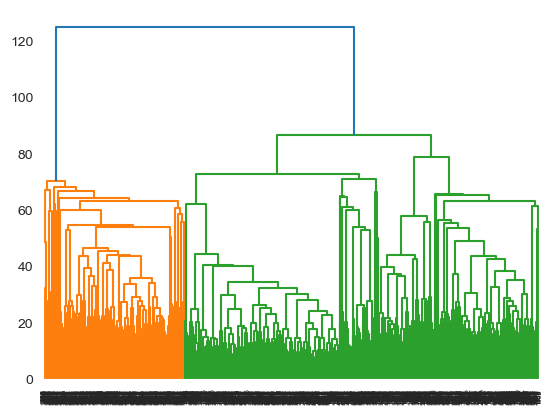

In [18]:
# Convert categorical variables to numeric
data_encoded = pd.get_dummies(data, drop_first=True)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded)  

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Visualize the Dendrogram
Z = linkage(X_scaled, 'ward') 
dendrogram(Z)
plt.show()

## Partitional Clustering

The data will now be divided into clusters using K-Means. A more conventional partitional clustering approach is K-Means, in which the number of clusters is predetermined.

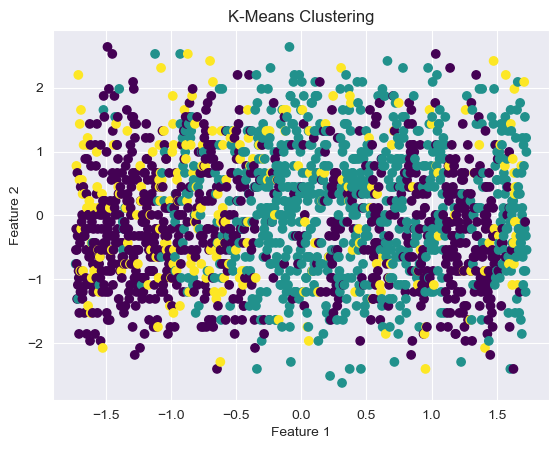

In [17]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualize the K-Means clusters 
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

##End of Answer 4##